# Homework 6 (30 marks)
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW6_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/09/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

Import all the libraries you require in the cell below.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree


### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
#Part A
dfM = pd.read_csv('mushrooms.csv')
pd.set_option('display.max_columns', None)
print(dfM.head())

#Part C
dfX = dfM.drop(['class'], axis=1)
dfX_list = dfX.columns.values.tolist()
dfM = pd.get_dummies(dfM, columns = dfX_list )
print(dfM.head())

#Part B
X = dfM.iloc[:, 1:]
y = dfM['class'] #Class is the target and dependent variable

#Part D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

#Part E
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s            

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1263    0]
 [   3 1172]]


<Figure size 432x288 with 0 Axes>

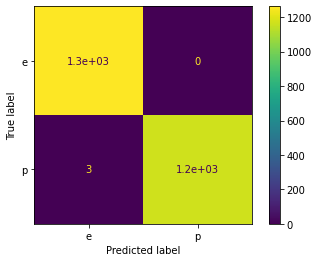

In [ ]:
y_pred = dt.predict(X_test)
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

plt.figure()
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
train_predictY = dt.predict(X_train)
print('Accuracy =', metrics.accuracy_score(y_train, train_predictY))


Accuracy = 1.0


4. Print the accuracy on the test partition? (2 marks)


In [ ]:
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))


Accuracy = 0.9987694831829368


5. Show the classification tree and save it (5 marks)


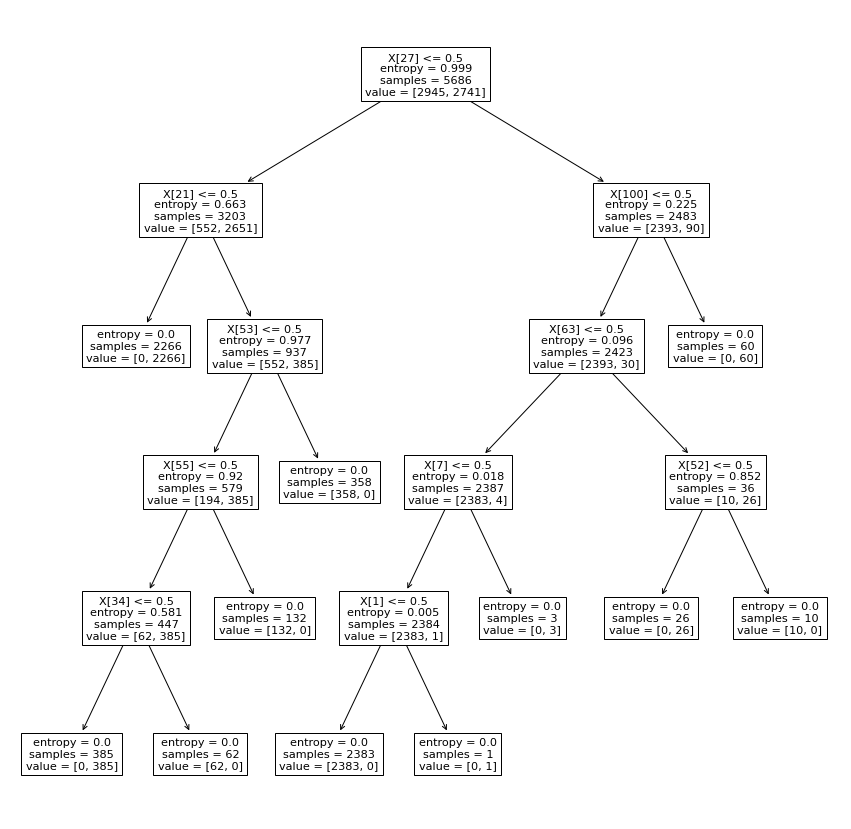

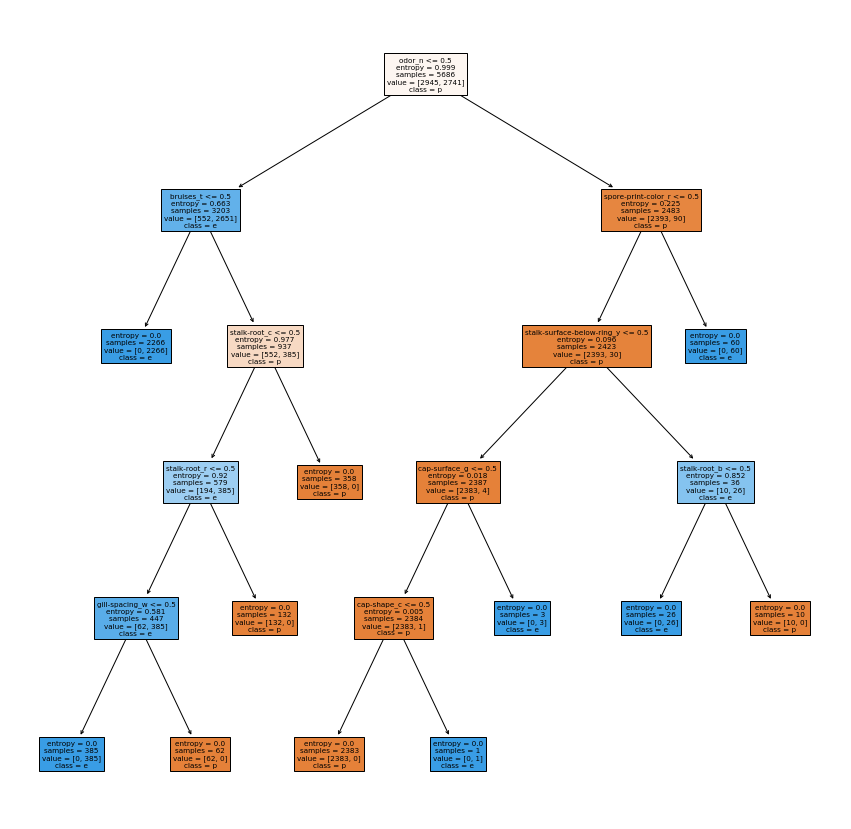

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(dt)
plt.show()

plt.figure(figsize=(15,15))
fn = X.columns
cn = y.unique()
MushTree = tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
print('Feature Importance:', dt.feature_importances_)
important =pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
print(important)

Feature Importance: [0.         0.00222887 0.         0.         0.         0.
 0.         0.00527896 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21269464 0.         0.
 0.         0.         0.         0.5278987  0.         0.
 0.         0.         0.         0.         0.04570394 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00540188 0.06737296
 0.         0.04806723 0.         0.         0.         0.
 0.         0.         0.         0.02812073 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
values = {'cap-shape_b': [0],'cap-shape_c': [0], 'cap-shape_f': [0], 'cap-shape_k': [0], 'cap-shape_s': [0],'cap-shape_x': [1],
          'cap-surface_f': [0], 'cap-surface_g': [0],'cap-surface_s': [1], 'cap-surface_y': [0],
          'cap-color_b' : [0], 'cap-color_c' : [0], 'cap-color_e' : [0], 'cap-color_g' : [0], 'cap-color_n' : [1],
          'cap-color_p' : [0], 'cap-color_r' : [0], 'cap-color_u' : [0], 'cap-color_w' : [0], 'cap-color_y' : [0],
          'bruises_f' : [0], 'bruises_t' : [1],
          'odor_a' : [0], 'odor_c' : [0], 'odor_f' : [0], 'odor_l' : [0], 'odor_m' : [0],
          'odor_n' : [0], 'odor_p' : [0], 'odor_s' : [0], 'odor_y' : [1],
          'gill-attachment_a' : [0], 'gill-attachment_f' : [1],
          'gill-spacing_c' : [1], 'gill-spacing_w' : [0],
          'gill-size_b' : [0], 'gill-size_n' : [1],
          'gill-color_b' : [0], 'gill-color_e' : [0], 'gill-color_g' : [0], 'gill-color_h' : [0],
          'gill-color_k' : [1], 'gill-color_n' : [0], 'gill-color_o' : [0], 'gill-color_p' : [0],
          'gill-color_r' : [0], 'gill-color_u' : [0], 'gill-color_w' : [0], 'gill-color_y' : [0],
          'stalk-shape_e' : [1], 'stalk-shape_t' : [0],
          'stalk-root_?' : [0], 'stalk-root_b' : [0], 'stalk-root_c' : [0], 'stalk-root_e' : [1], 'stalk-root_r' : [0],
          'stalk-surface-above-ring_f' : [0], 'stalk-surface-above-ring_k' : [0], 'stalk-surface-above-ring_s' : [1],
          'stalk-surface-above-ring_y' : [0],
          'stalk-surface-below-ring_f' : [0], 'stalk-surface-below-ring_k' : [0], 'stalk-surface-below-ring_s' : [0],
          'stalk-surface-below-ring_y' : [0],
          'stalk-color-above-ring_b' : [0], 'stalk-color-above-ring_c' : [0], 'stalk-color-above-ring_e' : [0], 'stalk-color-above-ring_g' : [0],
          'stalk-color-above-ring_n' : [0], 'stalk-color-above-ring_o' : [0], 'stalk-color-above-ring_p' : [0], 'stalk-color-above-ring_w' : [1], 'stalk-color-above-ring_y' : [0],
          'stalk-color-below-ring_b' : [0], 'stalk-color-below-ring_c' : [0], 'stalk-color-below-ring_e' : [0], 'stalk-color-below-ring_g' : [0],
          'stalk-color-below-ring_n' : [0], 'stalk-color-below-ring_o' : [0], 'stalk-color-below-ring_p' : [0], 'stalk-color-below-ring_w' : [1], 'stalk-color-below-ring_y' : [0],
          'veil-type_p' : [1],
          'veil-color_n' : [0], 'veil-color_o' : [0], 'veil-color_w' : [1], 'veil-color_y' : [0],
          'ring-number_n' : [0], 'ring-number_o' : [1], 'ring-number_t' : [0],
          'ring-type_e' : [0], 'ring-type_f' : [0], 'ring-type_l' : [0], 'ring-type_n' : [0], 'ring-type_p' : [1],
          'spore-print-color_b' : [0],  'spore-print-color_h' : [0], 'spore-print-color_k' : [0], 'spore-print-color_n' : [0],
          'spore-print-color_o' : [0], 'spore-print-color_r' : [1], 'spore-print-color_u' : [0], 'spore-print-color_w' : [0], 'spore-print-color_y' : [0],
          'population_a' : [0], 'population_c' : [0], 'population_n' : [0], 'population_s' : [1], 'population_v' : [0], 'population_y' : [0],
          'habitat_d' : [0], 'habitat_g' : [0], 'habitat_l' : [0], 'habitat_m' : [0], 'habitat_p' : [0], 'habitat_u' : [1], 'habitat_w' : [0]}



dfM_Values = pd.DataFrame(values)
print(dfM_Values.head())

print(dt.predict(dfM_Values))


   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   

   cap-color_b  cap-color_c  cap-color_e  cap-color_g  cap-color_n  \
0            0            0            0            0            1   

   cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  bruises_f  \
0            0            0            0            0            0          0   

   bruises_t  odor_a  odor_c  odor_f  odor_l  odor_m  odor_n  odor_p  odor_s  \
0          1       0       0       0       0       0       0       0       0   

   odor_y  gill-attachment_a  gill-attachment_f  gill-spacing_c  \
0       1                  0                  1               1   

   gill-spacing_w  gill-size_b  gill-size_n  gill-color_b  gill-color_e  \
0               0          